In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir {HOME}/datasets
!unzip "/content/drive/MyDrive/Colab Notebooks/basic-of-kaggle-diabetes.zip" -d "/content/datasets"

mkdir: cannot create directory ‘{HOME}/datasets’: No such file or directory
Archive:  /content/drive/MyDrive/Colab Notebooks/basic-of-kaggle-diabetes.zip
  inflating: /content/datasets/sample_submission.csv  
  inflating: /content/datasets/test.csv  
  inflating: /content/datasets/train.csv  


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/datasets/train.csv')
df.tail(5)

,ID,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
359,359,62,Female,Yes,Yes,Yes,Yes,No,No,Yes,No,No,No,Yes,No,No,Yes,Positive
360,360,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
361,361,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
362,362,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
363,363,42,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative


In [ ]:
df_test = pd.read_csv('/content/datasets/test.csv')
df_test.tail(5)

,ID,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity
151,151,30,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No
152,152,38,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No
153,153,37,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No
154,154,50,Female,No,Yes,Yes,Yes,No,No,Yes,No,No,Yes,No,No,No,No
155,155,40,Male,No,Yes,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No


# Data Preparation

In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  364 non-null    int64 
 1   age                 364 non-null    int64 
 2   gender              364 non-null    object
 3   polyuria            364 non-null    object
 4   polydipsia          364 non-null    object
 5   sudden_weight_loss  364 non-null    object
 6   weakness            364 non-null    object
 7   polyphagia          364 non-null    object
 8   genital_thrush      364 non-null    object
 9   visual_blurring     364 non-null    object
 10  itching             364 non-null    object
 11  irritability        364 non-null    object
 12  delayed_healing     364 non-null    object
 13  partial_paresis     364 non-null    object
 14  muscle_stiffness    364 non-null    object
 15  alopecia            364 non-null    object
 16  obesity             364 no

In [ ]:
df.isnull().sum()

ID                    0
age                   0
gender                0
polyuria              0
polydipsia            0
sudden_weight_loss    0
weakness              0
polyphagia            0
genital_thrush        0
visual_blurring       0
itching               0
irritability          0
delayed_healing       0
partial_paresis       0
muscle_stiffness      0
alopecia              0
obesity               0
class                 0
dtype: int64

In [ ]:
df1 = df.drop(['class'], axis=1)
df2 = df_test
merged_df = pd.concat([df1, df2], axis=0)
merged_df

,ID,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity
0,0,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No
1,1,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No
2,2,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
3,3,66,Male,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,No,No
4,4,67,Male,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,151,30,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No
152,152,38,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No
153,153,37,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No
154,154,50,Female,No,Yes,Yes,Yes,No,No,Yes,No,No,Yes,No,No,No,No


In [ ]:
data = merged_df.drop(['ID'], axis=1)
data

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity
0,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No
1,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No
2,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
3,66,Male,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,No,No
4,67,Male,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,30,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No
152,38,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No
153,37,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No
154,50,Female,No,Yes,Yes,Yes,No,No,Yes,No,No,Yes,No,No,No,No


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer, QuantileTransformer, PowerTransformer, LabelEncoder

In [ ]:
encoder = LabelEncoder()
ecode = data.select_dtypes(include=['object'])
for i in ecode.columns:
  encoded_data = encoder.fit_transform(data[i])
  data[i] = encoded_data
data.sample(10)

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity
51,50,0,1,1,1,1,1,0,1,0,0,0,1,0,0,1
169,30,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
127,60,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0
122,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
224,36,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
25,27,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,54,1,1,1,1,1,0,1,0,0,0,1,0,1,0,0
211,55,0,1,1,1,1,0,0,1,0,0,0,1,0,0,1
15,43,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0
75,43,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


In [ ]:
scaler = MinMaxScaler()
#data = data.select_dtypes(include=['int'])
data[data.columns] = scaler.fit_transform(data)
data.sample(10)

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity
133,0.932432,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
1,0.527027,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
107,0.445946,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
112,0.391892,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
120,0.162162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
84,0.527027,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
116,0.527027,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
69,0.189189,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
44,0.527027,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
63,0.162162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [ ]:
class_names, y_n = np.unique(df['class'], return_inverse=True)
n_values = np.max(y_n) + 1
y_hot = np.eye(n_values)[y_n]
print("class_names:", class_names)
print("y_hot:", y_hot[:10])

class_names: ['Negative' 'Positive']
y_hot: [[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [ ]:
data_fi = data[:len(df1)]
data_fi['class'] = y_n
data_fi.tail(10)

<ipython-input-231-f98aeb9a8a40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fi['class'] = y_n


,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
354,0.594595,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
355,0.567568,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0
356,0.513514,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
357,0.689189,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
358,0.675676,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0
359,0.621622,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
360,0.310811,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1
361,0.432432,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1
362,0.567568,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1
363,0.351351,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


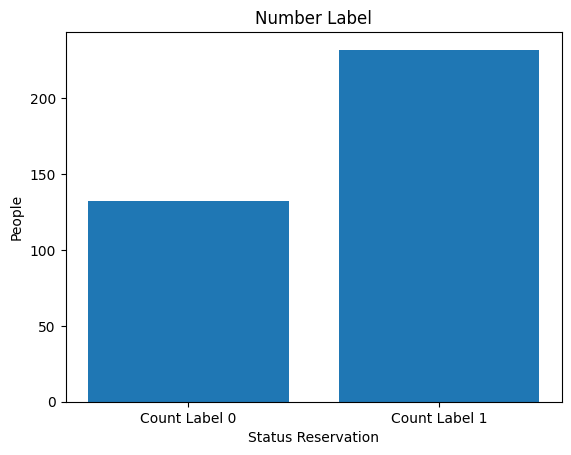

In [ ]:
import matplotlib.pyplot as plt

count_label0 = data_fi[data_fi['class'] == 0]['class'].count()
count_label1 = data_fi[data_fi['class'] == 1]['class'].count()

plt.bar(['Count Label 0', 'Count Label 1'], [count_label0, count_label1])
plt.xlabel('Status Reservation')
plt.ylabel('People')
plt.title('Number Label')
plt.show()

In [ ]:
from sklearn.utils import resample

class_0 = data_fi[data_fi['class'] == 0]
class_1 = data_fi[data_fi['class'] == 1]
class_0_upsampled = resample(class_0, replace=True, n_samples=len(class_1), random_state=28)
upsampled_data = pd.concat([class_1, class_0_upsampled])
upsampled_data

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,0.337838,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1
1,0.391892,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1
2,0.594595,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
3,0.675676,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1
4,0.689189,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,0.391892,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
233,0.405405,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
356,0.513514,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
278,0.378378,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0


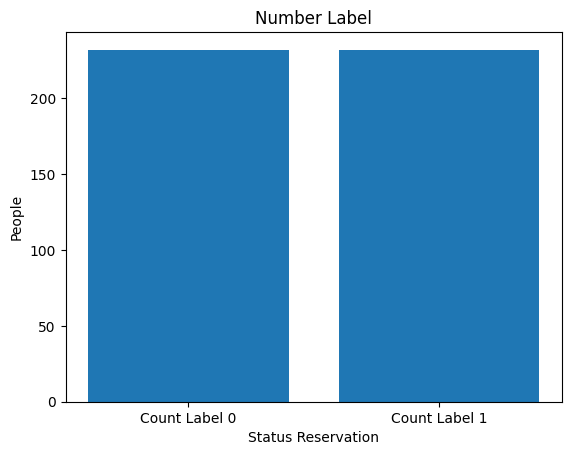

In [ ]:
count_label0 = upsampled_data[upsampled_data['class'] == 0]['class'].count()
count_label1 = upsampled_data[upsampled_data['class'] == 1]['class'].count()

plt.bar(['Count Label 0', 'Count Label 1'], [count_label0, count_label1])
plt.xlabel('Status Reservation')
plt.ylabel('People')
plt.title('Number Label')
plt.show()

<Axes: >

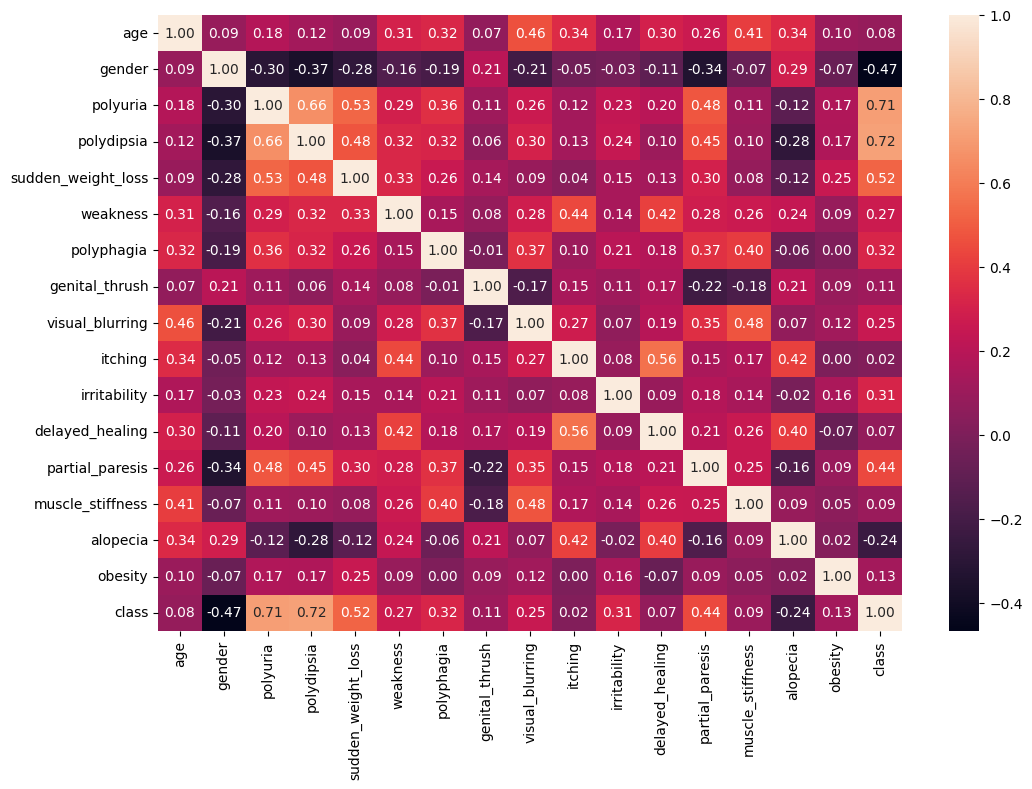

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(upsampled_data.corr(), annot=True, fmt=".2f")

In [ ]:
upsampled_data.columns

Index(['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity', 'class'],
      dtype='object')

In [ ]:
data2 = data[len(df1):]
data2 = data2[['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity']]
data2

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity
0,0.554054,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.527027,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.189189,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.391892,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
4,0.418919,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,0.189189,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
152,0.297297,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
153,0.283784,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
154,0.459459,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
X = upsampled_data[['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity']]
y = upsampled_data['class']
X

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity
0,0.337838,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
1,0.391892,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.594595,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0.675676,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
4,0.689189,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,0.391892,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
233,0.405405,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
356,0.513514,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278,0.378378,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0


In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
152    0
233    0
356    0
278    0
272    0
Name: class, Length: 464, dtype: int64

# Models

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.1, random_state = 28, stratify=y)
print("The shape of X_train is:", X_train.shape)
print("The shape of X_val is:",X_val.shape)
print("The shape of y_train is:",y_train.shape)
print("The shape of y_val is:",y_val.shape)

The shape of X_train is: (417, 16)
The shape of X_val is: (47, 16)
The shape of y_train is: (417,)
The shape of y_val is: (47,)


##XGBoost

In [ ]:
X_train_xgb, X_val_xgb, y_train_xgb, y_val_xgb = train_test_split(X, y, test_size = 0.1, random_state = 28, stratify=y)
print("The shape of X_train is:", X_train_xgb.shape)
print("The shape of X_val is:",X_val_xgb.shape)
print("The shape of y_train is:",y_train_xgb.shape)
print("The shape of y_val is:",y_val_xgb.shape)

The shape of X_train is: (417, 16)
The shape of X_val is: (47, 16)
The shape of y_train is: (417,)
The shape of y_val is: (47,)


In [ ]:
y_train_xgb = np.ravel(y_train_xgb)
y_val_xgb = np.ravel(y_val_xgb)

In [ ]:
import xgboost as xgb

params = {
    "objective": "multi:softmax",
    "num_class": 2,
    "max_depth": 18,
    "learning_rate": 0.1,
    "n_estimators": 200
}

xgb_model = xgb.XGBClassifier(**params)
xgb_model.fit(X_train_xgb,y_train_xgb)
y_xgb = xgb_model.predict(X_val_xgb)
print("accuracy rate = ", accuracy_score(y_val_xgb, y_xgb))

accuracy rate =  1.0


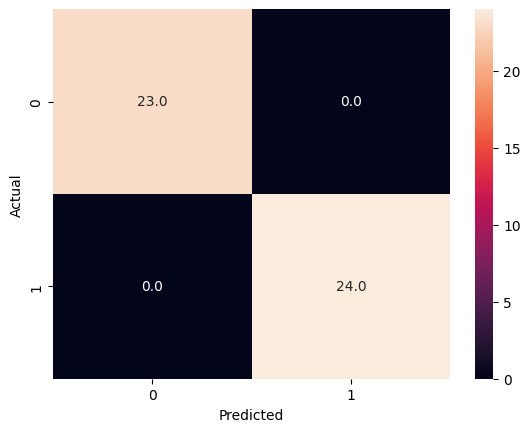

In [ ]:
sns.heatmap(confusion_matrix(y_val_xgb, y_xgb), annot=True, fmt=".1f")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Support Vector Machine

In [ ]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
y_svm = svm.predict(X_val)
print('accuracy rate =', accuracy_score(y_val, y_svm))

accuracy rate = 0.9459459459459459


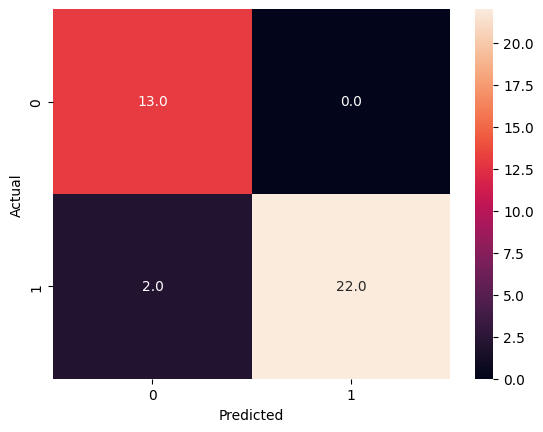

In [ ]:
sns.heatmap(confusion_matrix(y_val, y_svm), annot=True, fmt=".1f")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Decision tree

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

dt = ExtraTreesClassifier(n_estimators=200, criterion="log_loss")
dt.fit(X_train, y_train)
y_dt = dt.predict(X_val)
print("accuracy rate =", accuracy_score(y_val, y_dt))

accuracy rate = 0.9459459459459459


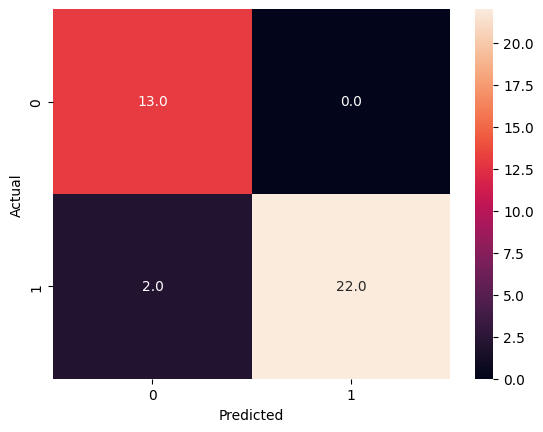

In [ ]:
sns.heatmap(confusion_matrix(y_val, y_dt), annot=True, fmt=".1f")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=200)
knn.fit(X_train, y_train)
y_knn = knn.predict(X_val)
print("accuracy rate = ", accuracy_score(y_val, y_knn))

accuracy rate =  0.7567567567567568


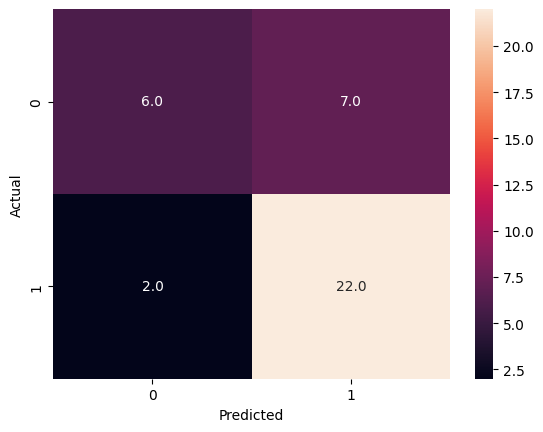

In [ ]:
sns.heatmap(confusion_matrix(y_val, y_knn), annot=True, fmt=".1f")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier(n_estimators=200, random_state=28)
randomforest.fit(X_train, y_train)
y_randomforest = randomforest.predict(X_val)
print("accuracy rate = ", accuracy_score(y_val, y_randomforest))

accuracy rate =  1.0


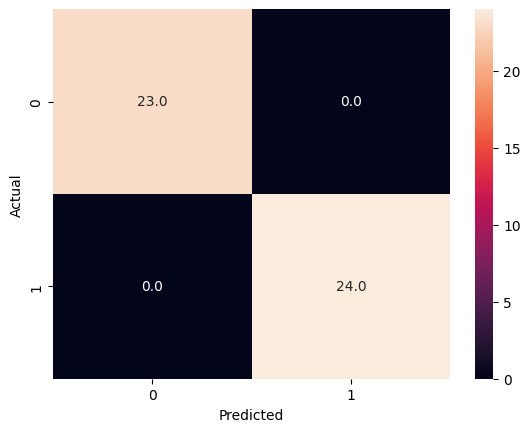

In [ ]:
sns.heatmap(confusion_matrix(y_val, y_randomforest), annot=True, fmt=".1f")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## LightGBM

In [ ]:
X_train_lgb, X_val_lgb, y_train_lgb, y_val_lgb = train_test_split(X, y_n, test_size = 0.1, random_state = 28, stratify=y_n)
print("The shape of X_train is:", X_train_lgb.shape)
print("The shape of X_val is:",X_val_lgb.shape)
print("The shape of y_train is:",y_train_lgb.shape)
print("The shape of y_val is:",y_val_lgb.shape)

The shape of X_train is: (327, 16)
The shape of X_val is: (37, 16)
The shape of y_train is: (327,)
The shape of y_val is: (37,)


In [ ]:
y_train_lgb = np.ravel(y_train_lgb)
y_val_lgb = np.ravel(y_val_lgb)

In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score

params = {
    "force_row_wise": True,
    "objective": "multiclass",
    "num_class": 2,
    "max_depth": 15,
    "learning_rate": 0.01,
    "n_estimators": 50,
    "num_leaves": 31,
}

lgb_model = lgb.LGBMClassifier(**params)
lgb_model.fit(X_train, y_train_lgb)

# Convert common_labels to a numpy array
common_labels = np.array(list(set(y_train_lgb) & set(y_val_lgb)))

# Filter validation set labels
mask = np.isin(y_val_lgb, common_labels)
X_val_filtered = X_val[mask]
y_val_filtered = y_val_lgb[mask]

y_lgb = lgb_model.predict(X_val_filtered)
print("accuracy rate = ", accuracy_score(y_val_filtered, y_lgb))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Total Bins 72
[LightGBM] [Info] Number of data points in the train set: 327, number of used features: 16
[LightGBM] [Info] Start training from score -1.010837
[LightGBM] [Info] Start training from score -0.452422
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

ValueError: y contains previously unseen labels: [17 54]

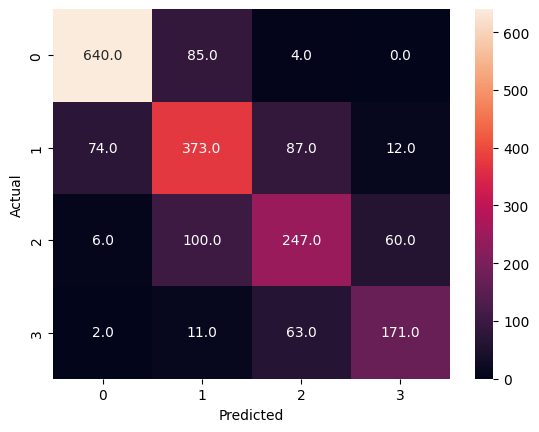

In [ ]:
sns.heatmap(confusion_matrix(y_val_lgb, y_lgb), annot=True, fmt=".1f")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lgb_model, X, y_n, cv=5)
scores

[LightGBM] [Info] Total Bins 4001
[LightGBM] [Info] Number of data points in the train set: 15479, number of used features: 114
[LightGBM] [Info] Start training from score -0.975610
[LightGBM] [Info] Start training from score -1.265866
[LightGBM] [Info] Start training from score -1.544350
[LightGBM] [Info] Start training from score -2.058916
[LightGBM] [Info] Total Bins 4006
[LightGBM] [Info] Number of data points in the train set: 15479, number of used features: 114
[LightGBM] [Info] Start training from score -0.975610
[LightGBM] [Info] Start training from score -1.265637
[LightGBM] [Info] Start training from score -1.544350
[LightGBM] [Info] Start training from score -2.059422
[LightGBM] [Info] Total Bins 4024
[LightGBM] [Info] Number of data points in the train set: 15479, number of used features: 114
[LightGBM] [Info] Start training from score -0.975610
[LightGBM] [Info] Start training from score -1.265637
[LightGBM] [Info] Start training from score -1.544350
[LightGBM] [Info] Star

array([0.72093023, 0.72816537, 0.72842377, 0.72945736, 0.73946756])

100%|██████████| 60/60 [31:25<00:00, 31.42s/it]


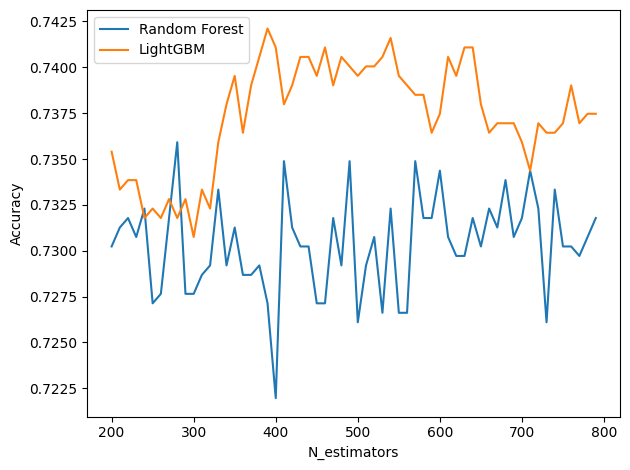

In [ ]:
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

acu_rf = []
acu_lgb = []
esti = range(200, 800, 10)

for i in tqdm(esti):
  randomforest = RandomForestClassifier(n_estimators=i)
  randomforest.fit(X_train, y_train)
  y_randomforest = randomforest.predict(X_val)
  acu_rf.append(accuracy_score(y_val, y_randomforest))

  params = {
      "force_row_wise": True,
      "objective": "multiclass",
      "num_class": 4,
      "max_depth": 15,
      "learning_rate": 0.1,
      "n_estimators": i,
      "num_leaves": 50,
      "verbose": 0
      }
  lgb_model = lgb.LGBMClassifier(**params)
  lgb_model.fit(X_train_lgb, y_train_lgb)
  y_lgb = lgb_model.predict(X_val_lgb)
  acu_lgb.append(accuracy_score(y_val_lgb, y_lgb))

plt.plot(esti, acu_rf, label='Random Forest')
plt.plot(esti, acu_lgb, label='LightGBM')
plt.xlabel('N_estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
max(acu_rf), max(acu_lgb)

(0.7405684754521964, 0.7395348837209302)

## MLPClassifier

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(35,))
for _ in range(100):
  mlp.fit(X_train, y_train)
y_mlp = mlp.predict(X_val)
print("accuracy rate =  ", accuracy_score(y_val, y_mlp))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

accuracy rate =   0.648578811369509


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
print("accuracy rate =  ", accuracy_score(y_val, y_mlp))

accuracy rate =   0.648578811369509


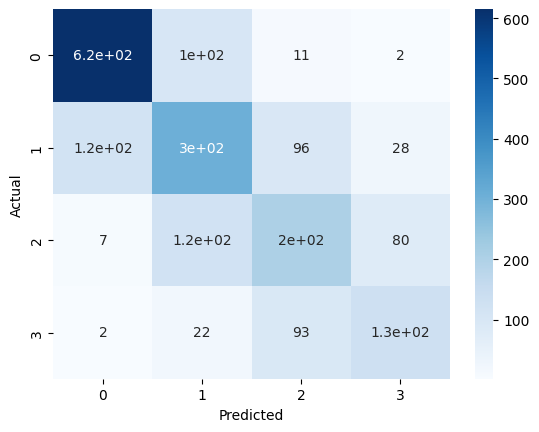

In [ ]:
sns.heatmap(confusion_matrix(y_val, y_mlp), annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Neural Networks

In [ ]:
from tensorflow.keras import Sequential, optimizers
from tensorflow.keras.layers import Dropout, Dense, Embedding, LSTM, Bidirectional, GRU, Flatten
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.regularizers import l2
import time

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y_hot, test_size = 0.1, random_state = 28, stratify=y)

print("The shape of X_train is:", X_train.shape)
print("The shape of X_val is:", X_val.shape)
print("The shape of y_train is:", y_train.shape)
print("The shape of y_val is:", y_val.shape)

The shape of X_train is: (327, 16)
The shape of X_val is: (37, 16)
The shape of y_train is: (327, 2)
The shape of y_val is: (37, 2)


In [ ]:
vocab_len = 90000
embed_size = 100

model = Sequential()
model.add(Embedding(vocab_len, embed_size, input_shape=(X_train.shape[1],)))
model.add(LSTM(units=128, activation='tanh', kernel_regularizer=l2(0.01), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=64, activation='tanh', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(units=2, activation='softmax', kernel_regularizer=l2(0.01)))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 16, 100)           9000000   
                                                                 
 lstm_2 (LSTM)               (None, 16, 128)           117248    
                                                                 
 dropout_2 (Dropout)         (None, 16, 128)           0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                                 
Total params: 9166786 (34.97 MB)
Trainable params: 916

In [ ]:
optimizer = optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
start = time.time()
history = model.fit(X_train, y_train, epochs=50, verbose=1, batch_size=64, validation_data=(X_val, y_val))
end = time.time()
print("Time Taken: {:.3f} secs".format(end - start))

Epoch 1/50
6/6 [==============================] - 11s 565ms/step - loss: 3.9112 - accuracy: 0.6391 - val_loss: 3.5501 - val_accuracy: 0.6486
Epoch 2/50
6/6 [==============================] - 2s 254ms/step - loss: 3.3900 - accuracy: 0.6361 - val_loss: 3.0550 - val_accuracy: 0.6486
Epoch 3/50
6/6 [==============================] - 2s 254ms/step - loss: 2.9113 - accuracy: 0.6361 - val_loss: 2.5945 - val_accuracy: 0.7027
Epoch 4/50
6/6 [==============================] - 2s 252ms/step - loss: 2.4490 - accuracy: 0.7737 - val_loss: 2.2480 - val_accuracy: 0.7297
Epoch 5/50
6/6 [==============================] - 2s 253ms/step - loss: 2.1184 - accuracy: 0.7890 - val_loss: 1.9616 - val_accuracy: 0.7297
Epoch 6/50
6/6 [==============================] - 2s 253ms/step - loss: 1.8618 - accuracy: 0.7492 - val_loss: 1.7357 - val_accuracy: 0.7568
Epoch 7/50
6/6 [==============================] - 2s 384ms/step - loss: 1.6313 - accuracy: 0.7768 - val_loss: 1.4907 - val_accuracy: 0.8108
Epoch 8/50
6/6 [===

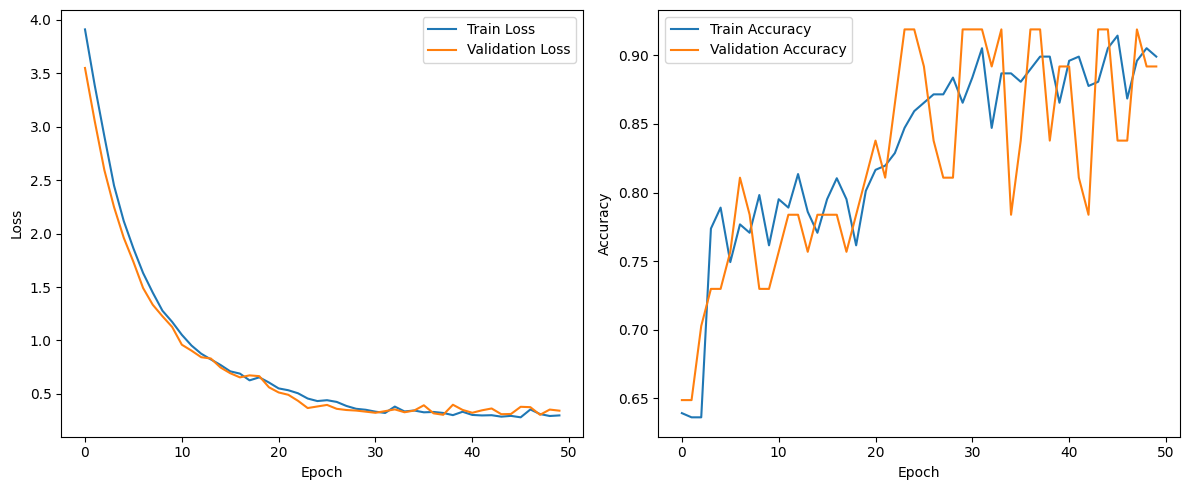

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
score = model.evaluate(X_val, y_val, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.7414347529411316
Test accuracy: 0.6780361533164978


61/61 [==============================] - 1s 6ms/step


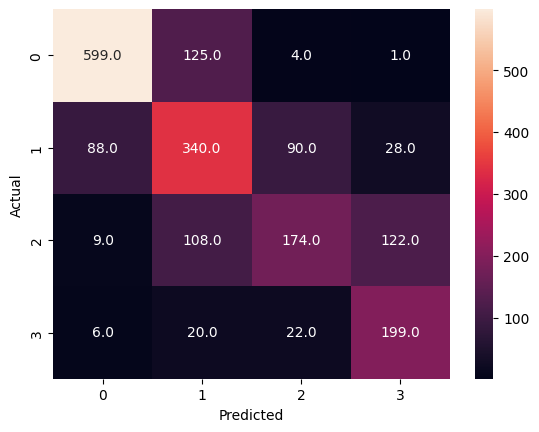

In [ ]:
y_nn = model.predict(X_val)
sns.heatmap(confusion_matrix(class_names[y_val.argmax(axis=1)], class_names[y_nn.argmax(axis=1)]), annot=True, fmt=".1f")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

##Compare Model

100%|██████████| 90/90 [02:28<00:00,  1.65s/it]


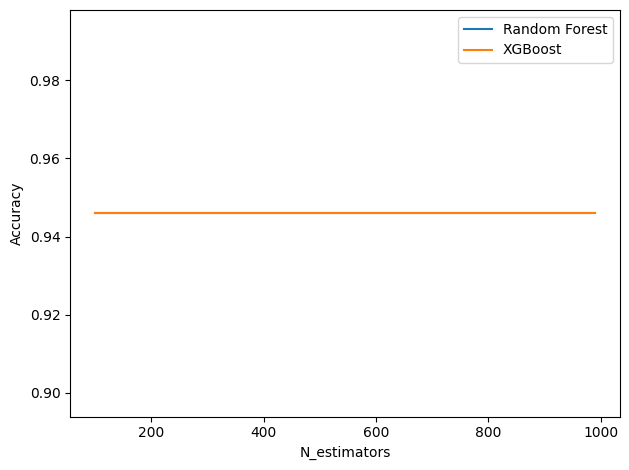

In [ ]:
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

acu_rf = []
acu_xgb = []
esti = range(100, 1000, 10)

for i in tqdm(esti):
  randomforest = RandomForestClassifier(n_estimators=i)
  randomforest.fit(X_train, y_train)
  y_randomforest = randomforest.predict(X_val)
  acu_rf.append(accuracy_score(y_val, y_randomforest))

  params = {
      "objective": "multi:softmax",
      "num_class": 3,
      "max_depth": 15,
      "learning_rate": 0.01,
      "n_estimators": i
      }
  xgb_model = xgb.XGBClassifier(**params)
  xgb_model.fit(X_train_xgb,y_train_xgb)
  y_xgb = xgb_model.predict(X_val_xgb)
  acu_xgb.append(accuracy_score(y_val_xgb, y_xgb))

plt.plot(esti, acu_rf, label='Random Forest')
plt.plot(esti, acu_xgb, label='XGBoost')
plt.xlabel('N_estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# Predict

In [ ]:
data2

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity
0,0.554054,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.527027,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.189189,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.391892,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
4,0.418919,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,0.189189,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
152,0.297297,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
153,0.283784,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
154,0.459459,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
data2.isnull().sum()

age                   0
gender                0
polyuria              0
polydipsia            0
sudden_weight_loss    0
weakness              0
polyphagia            0
genital_thrush        0
visual_blurring       0
itching               0
irritability          0
delayed_healing       0
partial_paresis       0
muscle_stiffness      0
alopecia              0
obesity               0
dtype: int64

In [ ]:
y_randomforest = randomforest.predict(data2)

In [ ]:
submission = pd.read_csv('/content/datasets/sample_submission.csv')
submission.tail(5)

,ID,class
151,151,NaN
152,152,NaN
153,153,NaN
154,154,NaN
155,155,NaN


In [ ]:
submission['class'] = class_names[y_randomforest]
submission.sample(10)

,ID,class
40,40,Positive
140,140,Negative
125,125,Negative
97,97,Positive
110,110,Positive
67,67,Positive
52,52,Positive
130,130,Negative
136,136,Negative
76,76,Negative


In [ ]:
sss = pd.read_csv('/content/randomforest_n_estimators_200.csv')

for i in range(len(sss)):
  if sss['class'][i] != submission['class'][i]:
    print(i, sss['class'][i], submission['class'][i])

In [ ]:
submission.to_csv('/content/randomforest_donwsampling.csv', index=False)